
**Name:** Safal Poudel  
**Course:** MSCS 634 – Data Visualization and Statistical Analysis  
**Lab Assignment:** Lab 1 – Data Visualization, Preprocessing, and Statistical Analysis


In [1]:

# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

%matplotlib inline


## Step 1: Data Collection – Load Dataset & Preview

In [3]:

# Load the prepared sample dataset (you can swap this path to use your own CSV)
df = pd.read_csv("/mnt/data/sample_sales.csv")
df['date'] = pd.to_datetime(df['date'])

df.head()


,date,product,category,region,units_sold,unit_price,discount,revenue,profit
0,2023-01-01,Gadget X,Electronics,West,6.0,112.83,0.156,571.03,72.23
1,2023-01-02,Gadget X,Electronics,West,12.0,111.91,0.000,1342.89,257.67
2,2023-01-02,Gadget Y,Electronics,South,9.0,126.37,0.073,1054.39,270.09
3,2023-01-02,Widget B,Office,North,11.0,18.50,0.124,178.16,30.08
4,2023-01-04,Gadget Y,Electronics,South,23.0,143.73,0.075,3056.18,225.63


## Step 2: Data Visualization


Create at least **two** plots. Below are examples for:
- Scatter Plot
- Line Plot
- Bar Chart
- Histogram
- Box Plot
- Pie Chart

Add a short description (insight) below each plot.


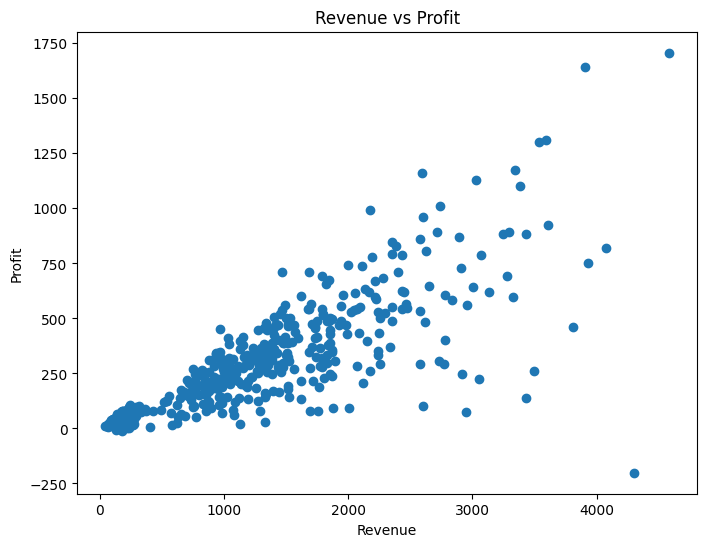

In [4]:

# Scatter Plot: Revenue vs Profit
plt.figure(figsize=(8,6))
plt.scatter(df['revenue'], df['profit'])
plt.title("Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()



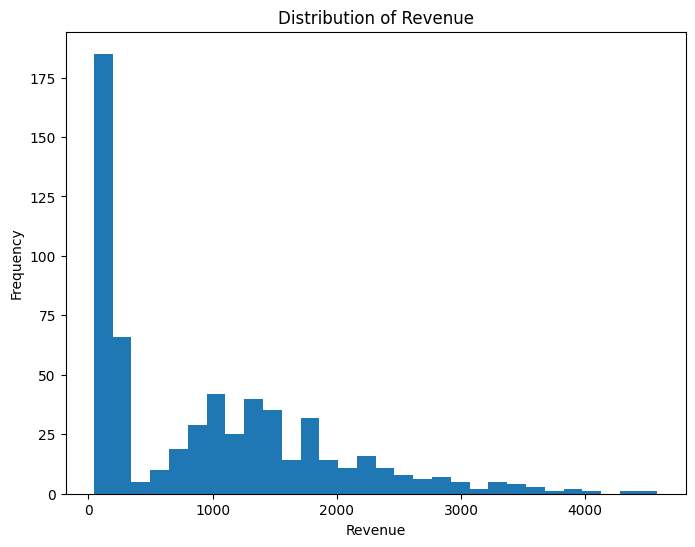

In [5]:

# Histogram: Distribution of Revenue
plt.figure(figsize=(8,6))
plt.hist(df['revenue'].dropna(), bins=30)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()



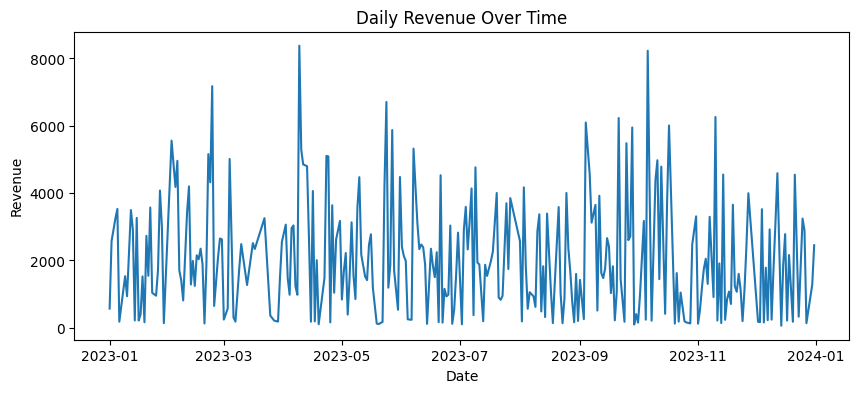

In [6]:

# Line Plot: Daily Total Revenue Over Time
daily_rev = df.groupby('date')['revenue'].sum().reset_index()
plt.figure(figsize=(10,4))
plt.plot(daily_rev['date'], daily_rev['revenue'])
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()



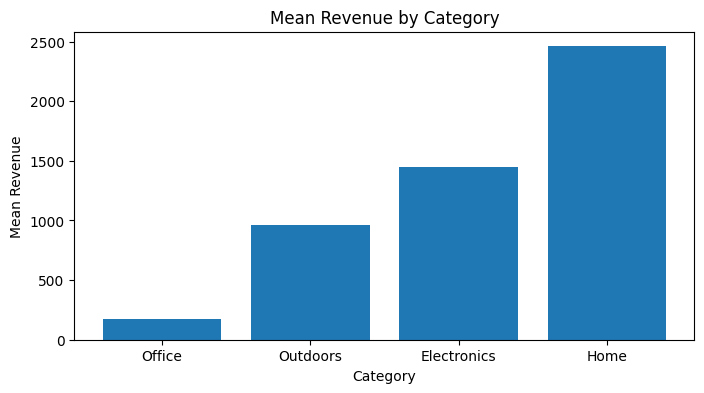

In [7]:

# Bar Chart: Mean Revenue by Category
mean_rev_by_cat = df.groupby('category')['revenue'].mean().sort_values()
plt.figure(figsize=(8,4))
plt.bar(mean_rev_by_cat.index, mean_rev_by_cat.values)
plt.title("Mean Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Mean Revenue")
plt.show()


/tmp/ipython-input-2765270738.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_cat, labels=df['category'].unique())


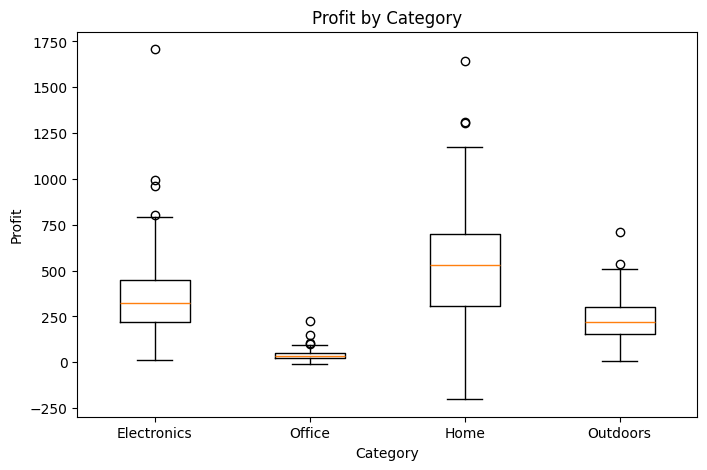

In [8]:

# Box Plot: Profit by Category
data_by_cat = [df.loc[df['category']==c, 'profit'].dropna() for c in df['category'].unique()]
plt.figure(figsize=(8,5))
plt.boxplot(data_by_cat, labels=df['category'].unique())
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()


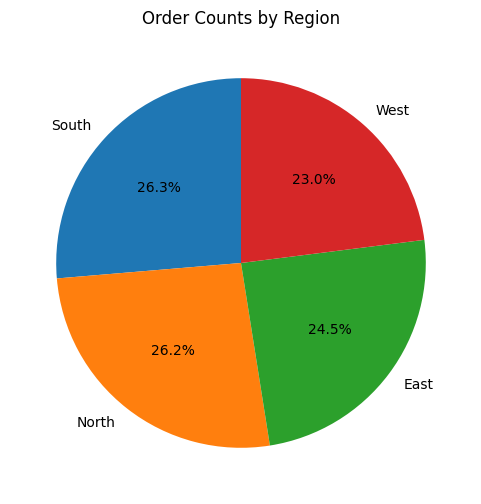

In [9]:

# Pie Chart: Sales Count by Region
counts = df['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Order Counts by Region")
plt.show()


## Step 3: Data Preprocessing

### 3.1 Handling Missing Values

In [10]:

# Detect missing values
missing_before = df.isna().sum()
print("Missing values BEFORE:")
print(missing_before)

# Keep a copy for 'before' screenshot
df_before_missing = df.copy()

# Example strategies
# Fill numeric columns with mean; categorical with mode
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

missing_after = df.isna().sum()
print("\nMissing values AFTER:")
print(missing_after)

print("\nHEAD BEFORE:")
df_before_missing.head()


Missing values BEFORE:
date           0
product        0
category       0
region         0
units_sold    14
unit_price     0
discount      21
revenue        0
profit         0
dtype: int64

Missing values AFTER:
date          0
product       0
category      0
region        0
units_sold    0
unit_price    0
discount      0
revenue       0
profit        0
dtype: int64

HEAD BEFORE:


,date,product,category,region,units_sold,unit_price,discount,revenue,profit
0,2023-01-01,Gadget X,Electronics,West,6.0,112.83,0.156,571.03,72.23
1,2023-01-02,Gadget X,Electronics,West,12.0,111.91,0.000,1342.89,257.67
2,2023-01-02,Gadget Y,Electronics,South,9.0,126.37,0.073,1054.39,270.09
3,2023-01-02,Widget B,Office,North,11.0,18.50,0.124,178.16,30.08
4,2023-01-04,Gadget Y,Electronics,South,23.0,143.73,0.075,3056.18,225.63


In [11]:

print("HEAD AFTER:")
df.head()


HEAD AFTER:


,date,product,category,region,units_sold,unit_price,discount,revenue,profit
0,2023-01-01,Gadget X,Electronics,West,6.0,112.83,0.156,571.03,72.23
1,2023-01-02,Gadget X,Electronics,West,12.0,111.91,0.000,1342.89,257.67
2,2023-01-02,Gadget Y,Electronics,South,9.0,126.37,0.073,1054.39,270.09
3,2023-01-02,Widget B,Office,North,11.0,18.50,0.124,178.16,30.08
4,2023-01-04,Gadget Y,Electronics,South,23.0,143.73,0.075,3056.18,225.63


### 3.2 Outlier Detection and Removal (IQR)

In [12]:

# We will handle outliers for 'revenue' as an example using IQR
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

outliers_mask = (df['revenue'] < lower_bound) | (df['revenue'] > upper_bound)
print("Number of outliers in 'revenue':", outliers_mask.sum())

# Show some outliers
df_outliers = df.loc[outliers_mask, ['date','product','revenue','profit']].head(10)
df_outliers


IQR: 1337.45
Lower Bound: -1830.48, Upper Bound: 3519.31
Number of outliers in 'revenue': 9


,date,product,revenue,profit
31,2023-01-27,Device Pro,4077.68,818.34
151,2023-04-11,Device Pro,3532.47,1302.68
161,2023-04-16,Device Pro,3907.69,1643.18
175,2023-04-24,Device Pro,3611.68,924.24
300,2023-07-04,Device Pro,3593.33,1312.29
410,2023-09-06,Gadget Y,4582.02,1707.36
464,2023-10-06,Device Pro,3929.53,750.92
465,2023-10-06,Device Pro,4300.23,-201.28
517,2023-11-10,Device Pro,3810.29,463.20


In [13]:

# Remove outliers for 'revenue'
df_no_outliers = df.loc[~outliers_mask].copy()

print("Shape BEFORE:", df.shape)
print("Shape AFTER (no revenue outliers):", df_no_outliers.shape)

df_no_outliers.head()


Shape BEFORE: (600, 9)
Shape AFTER (no revenue outliers): (591, 9)


,date,product,category,region,units_sold,unit_price,discount,revenue,profit
0,2023-01-01,Gadget X,Electronics,West,6.0,112.83,0.156,571.03,72.23
1,2023-01-02,Gadget X,Electronics,West,12.0,111.91,0.000,1342.89,257.67
2,2023-01-02,Gadget Y,Electronics,South,9.0,126.37,0.073,1054.39,270.09
3,2023-01-02,Widget B,Office,North,11.0,18.50,0.124,178.16,30.08
4,2023-01-04,Gadget Y,Electronics,South,23.0,143.73,0.075,3056.18,225.63


### 3.3 Data Reduction

In [14]:

# Sampling: takes 60% random sample
df_reduced_sample = df_no_outliers.sample(frac=0.6, random_state=42).copy()

# Dimension elimination: dropped a less-relevant column (example: product)
df_reduced_dims = df_reduced_sample.drop(columns=['product'])

print("Shape BEFORE:", df_no_outliers.shape)
print("Shape AFTER sampling:", df_reduced_sample.shape)
print("Shape AFTER dropping 'product':", df_reduced_dims.shape)

print("\nHEAD BEFORE (no_outliers):")
df_no_outliers.head()


Shape BEFORE: (591, 9)
Shape AFTER sampling: (355, 9)
Shape AFTER dropping 'product': (355, 8)

HEAD BEFORE (no_outliers):


,date,product,category,region,units_sold,unit_price,discount,revenue,profit
0,2023-01-01,Gadget X,Electronics,West,6.0,112.83,0.156,571.03,72.23
1,2023-01-02,Gadget X,Electronics,West,12.0,111.91,0.000,1342.89,257.67
2,2023-01-02,Gadget Y,Electronics,South,9.0,126.37,0.073,1054.39,270.09
3,2023-01-02,Widget B,Office,North,11.0,18.50,0.124,178.16,30.08
4,2023-01-04,Gadget Y,Electronics,South,23.0,143.73,0.075,3056.18,225.63


In [ ]:

print("HEAD AFTER (reduced_dims):")
df_reduced_dims.head()


### 3.4 Data Scaling and Discretization

In [15]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Keep a copy for 'before' view
df_before_scaling = df_reduced_dims.copy()

# Choose some numeric columns to scale
scale_cols = ['units_sold','unit_price','discount','revenue','profit']

scaler = MinMaxScaler()
df_scaled = df_reduced_dims.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

# Discretize revenue into 3 bins
df_scaled['revenue_bucket'] = pd.cut(df_scaled['revenue'], bins=3, labels=['Low','Medium','High'])

print("HEAD BEFORE SCALING/DISCRETIZATION:")
df_before_scaling.head()


HEAD BEFORE SCALING/DISCRETIZATION:


,date,category,region,units_sold,unit_price,discount,revenue,profit
513,2023-11-06,Electronics,North,12.0,112.59,0.148,1150.77,415.67
595,2023-12-26,Office,South,4.0,11.87,0.061,44.57,11.69
199,2023-05-08,Office,North,16.0,12.32,0.003,196.44,64.16
168,2023-04-22,Office,North,12.0,11.91,0.065,133.56,45.64
459,2023-10-04,Office,East,17.0,11.29,0.088,175.09,26.03


In [16]:

print("HEAD AFTER SCALING/DISCRETIZATION:")
df_scaled.head()


HEAD AFTER SCALING/DISCRETIZATION:


,date,category,region,units_sold,unit_price,discount,revenue,profit,revenue_bucket
513,2023-11-06,Electronics,North,0.476190,0.441117,0.718447,0.326669,0.357469,Low
595,2023-12-26,Office,South,0.095238,0.004551,0.296117,0.000000,0.014427,Low
199,2023-05-08,Office,North,0.666667,0.006502,0.014563,0.044848,0.058982,Low
168,2023-04-22,Office,North,0.476190,0.004725,0.315534,0.026279,0.043256,Low
459,2023-10-04,Office,East,0.714286,0.002037,0.427184,0.038544,0.026604,Low


## Step 4: Statistical Analysis

### 4.1 General Overview (.info and .describe)

In [17]:

print("INFO:")
df_scaled.info()


INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 513 to 97
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            355 non-null    datetime64[ns]
 1   category        355 non-null    object        
 2   region          355 non-null    object        
 3   units_sold      355 non-null    float64       
 4   unit_price      355 non-null    float64       
 5   discount        355 non-null    float64       
 6   revenue         355 non-null    float64       
 7   profit          355 non-null    float64       
 8   revenue_bucket  355 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(5), object(2)
memory usage: 25.4+ KB


In [18]:

print("DESCRIBE:")
df_scaled.describe(include='all')


DESCRIBE:


,date,category,region,units_sold,unit_price,discount,revenue,profit,revenue_bucket
count,355,355,355,355.000000,355.000000,355.000000,355.000000,355.000000,355
unique,NaN,4,4,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Office,North,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,158,98,NaN,NaN,NaN,NaN,NaN,230
mean,2023-07-02 03:30:55.774647808,NaN,NaN,0.476062,0.318841,0.391726,0.262561,0.191894,NaN
min,2023-01-01 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2023-04-09 00:00:00,NaN,NaN,0.380952,0.019440,0.240291,0.036837,0.038853,NaN
50%,2023-07-05 00:00:00,NaN,NaN,0.476190,0.310303,0.388978,0.232510,0.109923,NaN
75%,2023-09-23 00:00:00,NaN,NaN,0.571429,0.528022,0.543689,0.421952,0.301599,NaN
max,2023-12-31 00:00:00,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


### 4.2 Central Tendency Measures (min, max, mean, median, mode)

In [19]:

col = 'revenue'
minimum = df_scaled[col].min()
maximum = df_scaled[col].max()
mean_val = df_scaled[col].mean()
median_val = df_scaled[col].median()
mode_val = df_scaled[col].mode().iloc[0]

print(f"{col} -> min: {minimum:.4f}, max: {maximum:.4f}, mean: {mean_val:.4f}, median: {median_val:.4f}, mode: {mode_val:.4f}")


revenue -> min: 0.0000, max: 1.0000, mean: 0.2626, median: 0.2325, mode: 0.0000


### 4.3 Dispersion (Range, Quartiles, IQR, Variance, Std Dev)

In [20]:

col = 'revenue'
min_v = df_scaled[col].min()
max_v = df_scaled[col].max()
range_v = max_v - min_v
q1 = df_scaled[col].quantile(0.25)
q3 = df_scaled[col].quantile(0.75)
iqr = q3 - q1
var = df_scaled[col].var()
std = df_scaled[col].std()

print(f"{col} -> range: {range_v:.4f}, Q1: {q1:.4f}, Q3: {q3:.4f}, IQR: {iqr:.4f}, variance: {var:.6f}, std: {std:.6f}")


revenue -> range: 1.0000, Q1: 0.0368, Q3: 0.4220, IQR: 0.3851, variance: 0.063498, std: 0.251988


### 4.4 Correlation Analysis (.corr)

In [21]:

numeric_df = df_scaled.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Display correlation matrix
corr


,units_sold,unit_price,discount,revenue,profit
units_sold,1.000000,0.017463,0.024413,0.271839,0.244054
unit_price,0.017463,1.000000,0.085555,0.934720,0.772398
discount,0.024413,0.085555,1.000000,0.030157,-0.144676
revenue,0.271839,0.934720,0.030157,1.000000,0.844332
profit,0.244054,0.772398,-0.144676,0.844332,1.000000


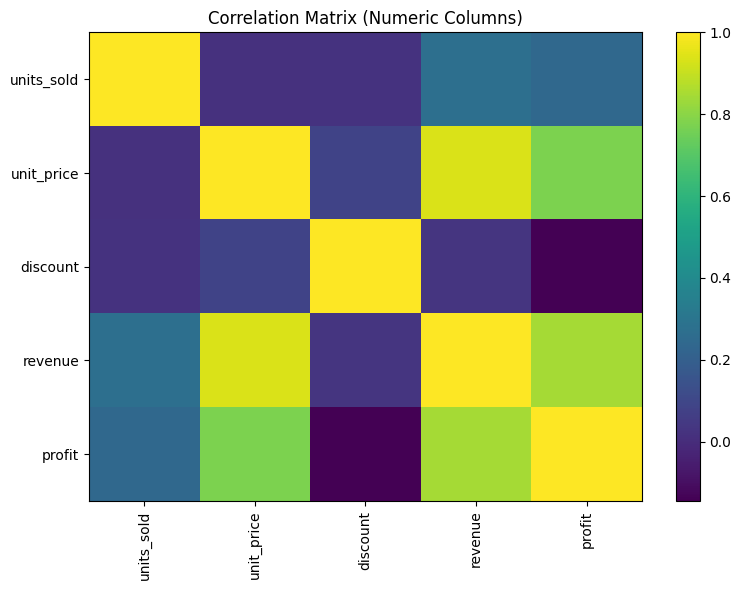

In [22]:

# Heatmap using matplotlib (no seaborn)
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=range(len(corr.index)), labels=corr.index)
plt.title("Correlation Matrix (Numeric Columns)")
plt.tight_layout()
plt.show()
